## Milestone 2 steps:

In [1]:
import rasterio
from rasterio.mask import mask
from rasterio.windows import from_bounds
from rasterstats import zonal_stats
from rasterio.windows import Window
from shapely.geometry import box
from pathlib import Path
import numpy as np
from scipy.ndimage import label, generate_binary_structure
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx
import time

# yt packages
import yt
import yt.extensions.geotiff

# CPU usage
import psutil

# package of resampling methods
from rasterio.enums import Resampling

from rasterio.warp import calculate_default_transform, reproject, Resampling


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load *.jp2 format and add field bands

In [3]:
s2_file = ('C:/Users/arevi/OneDrive/YT_GITHUB_v2/TEST_DATASETS/s2_sample/T30UVG_20200601T113331_B02_10m.jp2')

In [4]:
ds = yt.load(s2_file)

yt : [INFO     ] 2021-03-18 22:55:44,327 Parameters: domain_dimensions         = [10980 10980     1]
yt : [INFO     ] 2021-03-18 22:55:44,331 Parameters: domain_left_edge          = [ 399960. 6090240.       0.] m
yt : [INFO     ] 2021-03-18 22:55:44,333 Parameters: domain_right_edge         = [5.09760e+05 6.20004e+06 1.00000e+00] m


In [ ]:
ds.field_list

In [ ]:
ds._field_filename

In [5]:
# Define dimensions
width = ds.arr(1000, 'm')
height = ds.arr(1000,'m') 
rectangle_centre = ds.arr([487309,6196162],'m')

rectangular_yt_container = ds.rectangle_from_center(rectangle_centre,width,height)

In [6]:
rectangular_yt_container[('bands','B02_60')]

yt : [INFO     ] 2021-03-18 22:55:50,651 Resampling B02_60: 60.0 to 10.0 m.


unyt_array([373., 373., 373., ..., 370., 493., 493.], '(dimensionless)')

In [ ]:
import pdb; pdb.pm()

yt : [INFO     ] 2021-03-18 22:55:59,251 xlim = 486809.000000 487809.000000
yt : [INFO     ] 2021-03-18 22:55:59,253 ylim = 6195662.000000 6196662.000000
yt : [INFO     ] 2021-03-18 22:55:59,254 xlim = 486809.000000 487809.000000
yt : [INFO     ] 2021-03-18 22:55:59,255 ylim = 6195662.000000 6196662.000000
yt : [INFO     ] 2021-03-18 22:55:59,257 Making a fixed resolution buffer of (('bands', 'B02_60')) 800 by 800



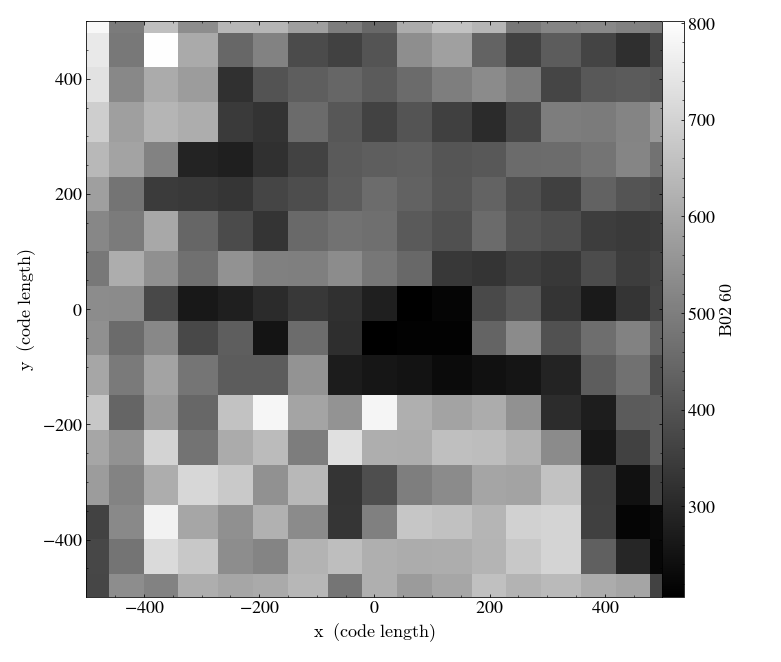

yt : [INFO     ] 2021-03-18 22:56:01,127 Resampling B02_20: 20.0 to 10.0 m.
yt : [INFO     ] 2021-03-18 22:56:01,131 xlim = 486809.000000 487809.000000
yt : [INFO     ] 2021-03-18 22:56:01,131 ylim = 6195662.000000 6196662.000000
yt : [INFO     ] 2021-03-18 22:56:01,133 xlim = 486809.000000 487809.000000
yt : [INFO     ] 2021-03-18 22:56:01,135 ylim = 6195662.000000 6196662.000000
yt : [INFO     ] 2021-03-18 22:56:01,139 Making a fixed resolution buffer of (('bands', 'B02_20')) 800 by 800



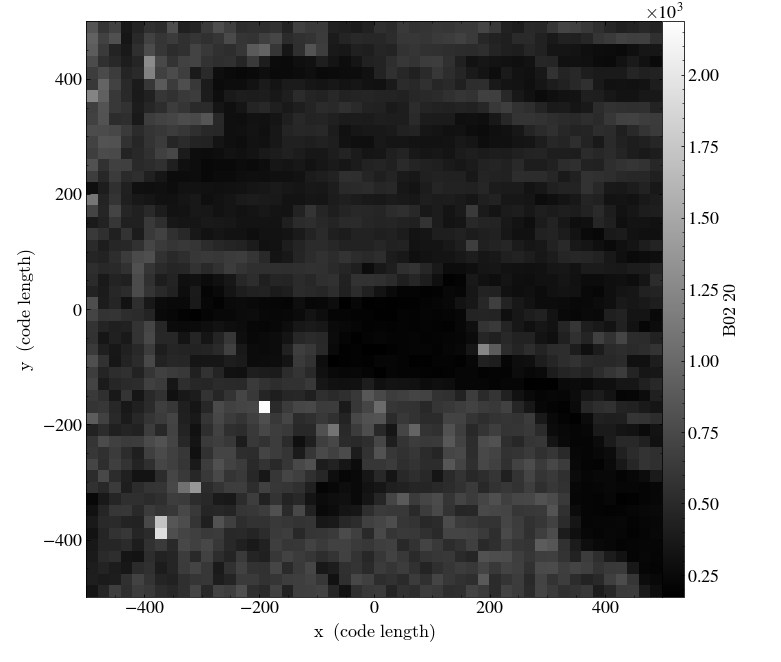

In [7]:
p = ds.plot(('bands', 'B02_60'), height=height, width=width, center=rectangle_centre)
p.set_log(('bands', 'B02_60'), False)
p.set_cmap(('bands', 'B02_60'), 'B-W LINEAR')
p.show()

p1 = ds.plot(('bands', 'B02_20'), height=height, width=width, center=rectangle_centre)
p1.set_log(('bands', 'B02_20'), False)
p1.set_cmap(('bands', 'B02_20'), 'B-W LINEAR')
p1.show()

## Rasterio reprojecting image

In [ ]:
# destination geographical coordinate system
dst_crs = 'EPSG:4326'

In [ ]:
with rasterio.open(s2_file) as dataset:
    original_image = dataset.read(1)
    print(dataset.crs)

In [ ]:
with rasterio.open(s2_file) as src:
    print(src.shape)
    print(src.dtypes)
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    reproject_array = np.zeros((224,472),dtypes=np.uint8)
    
    with rasterio.open('C:/Users/arevi/OneDrive/YT_GITHUB_v2/TEST_DATASETS/test_crs.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)
        print(dst.shape)

In [ ]:
np.zeros((224,472))

In [ ]:
num = 20.0

In [ ]:
num2=round(num)

In [ ]:
num2

In [ ]:
data = {"filename": 'FILENAME', "resolution": 'RESOLUTION'}